# 🦜🔗 LangChain CPAL (Causal Program-Aided Language)

CPAL ist eine alte Legacy Chain. Sie hat es trotzdem hier ins Repo geschafft, weil die Anwendung spannend ist.
Wir zerlegen kurz den Begriff CPAL:

LLMs sind gut in Sprache, aber nicht in Mathe. Daher entstand das Konzept [PAL](https://arxiv.org/abs/2211.10435) (Program Aided Language). Hier löst das LLM z.B. eine mathematische Textaufabe oder ein mathematisches Problem nicht selbst.

Vielmehr erstellt das LLM Code, der explizit dafür geschaffen ist, das Problem zu lösen.

CPAL ist eine verfeinerte Technik, in der aus den einzelnen Informationsbrocken in einer Textaufgabe Ein Graph (Hat nix mit LangGraph zu tun) aufgebaut wird. Nehmen wir diese Textaufgabe:


In [ ]:
question = (
    "Tim buys the same number of pets as Cindy and Boris."
    "Cindy buys the same number of pets as Bill plus Bob."
    "Boris buys the same number of pets as Ben plus Beth."
    "Bill buys the same number of pets as Obama."
    "Bob buys the same number of pets as Obama."
    "Ben buys the same number of pets as Obama."
    "Beth buys the same number of pets as Obama."
    "If Obama buys one pet, how many pets total does everyone buy?"
)

- Aus jedem Stück Information generiert das LLM einen Knoten.
- In einem Knoten steht dann immer ein mathematischer Ausdruck, der exakt ausgerechnet werden kann, wenn eine bestimmte Bedingung eintritt. (Wenn Obama = 1, dann Bill = 1)
- Dann nagelt das LLM alle Anfangsbedingungen fest und rechnet alle Operationen aus, die es im Graphen aufgrund der Anfangsbedingungen ausrechnen kann.
- Zuletzt wird geschaut, ob die Frage nun als Wert irgendwo im Diagramm zu finden ist (Eigentlich wird der Graph in eine kleine DuckDB-Tabelle umgewandelt und eine SQL-Query darauf geworfen)


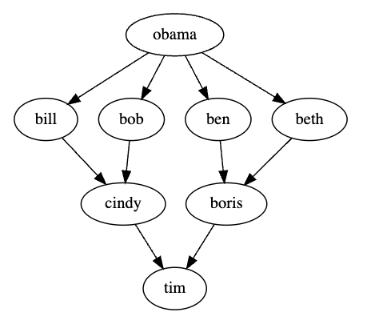


In [ ]:
from langchain_experimental.cpal.base import CPALChain
from helpers import llm

cpal_chain = CPALChain.from_univariate_prompt(llm=llm(temperature=0), verbose=True)

In [ ]:
result = cpal_chain.invoke(question)
print(result["chain_answer"])

In [ ]:
question = (
    "Jan has three times the number of pets as Marcia."
    "Marcia has two more pets than Cindy."
    "If Cindy has ten pets, how many pets does Barak have?"
)
result = cpal_chain.invoke(question)
print(result["chain_answer"])

Ups...
